# Import Library

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import drive
import os
import calendar
from sklearn.preprocessing import MinMaxScaler

In [ ]:
print(pd.__version__)
print(np.__version__)
print(sns.__version__)

1.5.3
1.22.4
0.12.2


# Load Dataset

In [48]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
#Path File In GDrive
file_path = '/content/drive/MyDrive/Rakamin/JAP/Mini Project - 2. Investigate Hotel Business using Data Visualization/hotel_bookings_data.csv'

In [50]:
df = pd.read_csv(file_path)
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
50694,City Hotel,1,204,2018,July,19,5,0,3,1,...,0,Non Refund,34.0,NaN,96,Personal,90.0,0,0,Canceled
61353,City Hotel,1,45,2018,February,50,8,0,3,1,...,0,No Deposit,9.0,NaN,0,Personal,86.4,0,2,Canceled
58484,City Hotel,1,28,2018,December,42,13,0,1,1,...,0,No Deposit,234.0,NaN,0,Family,120.0,0,0,Canceled
72039,City Hotel,1,179,2019,September,29,18,0,3,2,...,0,No Deposit,9.0,NaN,0,Personal,107.1,0,1,Canceled
70094,City Hotel,1,219,2019,August,23,9,1,2,2,...,0,Non Refund,20.0,NaN,0,Personal,105.0,0,0,Canceled


#EDA

## Descriptive Statistics

In [ ]:
#Cek Jumlah kolom dan type data tiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
# Deskripsi statistik kolom type numerik

df[numeric_cols].describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2018.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2018.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2018.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2019.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2019.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
# Deskripsi statistik kolom type categorical

df[object_cols].describe()

,hotel,arrival_date_month,meal,city,market_segment,distribution_channel,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,3,4,3
top,City Hotel,October,Breakfast,Kota Denpasar,Online TA,TA/TO,No Deposit,Personal,Check-Out
freq,79330,13877,92310,48590,56477,97870,104641,89613,75166


In [ ]:
# Deskripsi statistik kolom type tanggal

df[date].describe()

,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
count,287,287,287,287
unique,284,97,127,53
top,1987-06-14,2011-01-10,2020-1-14,-
freq,2,12,17,198


## Univariate Analysis

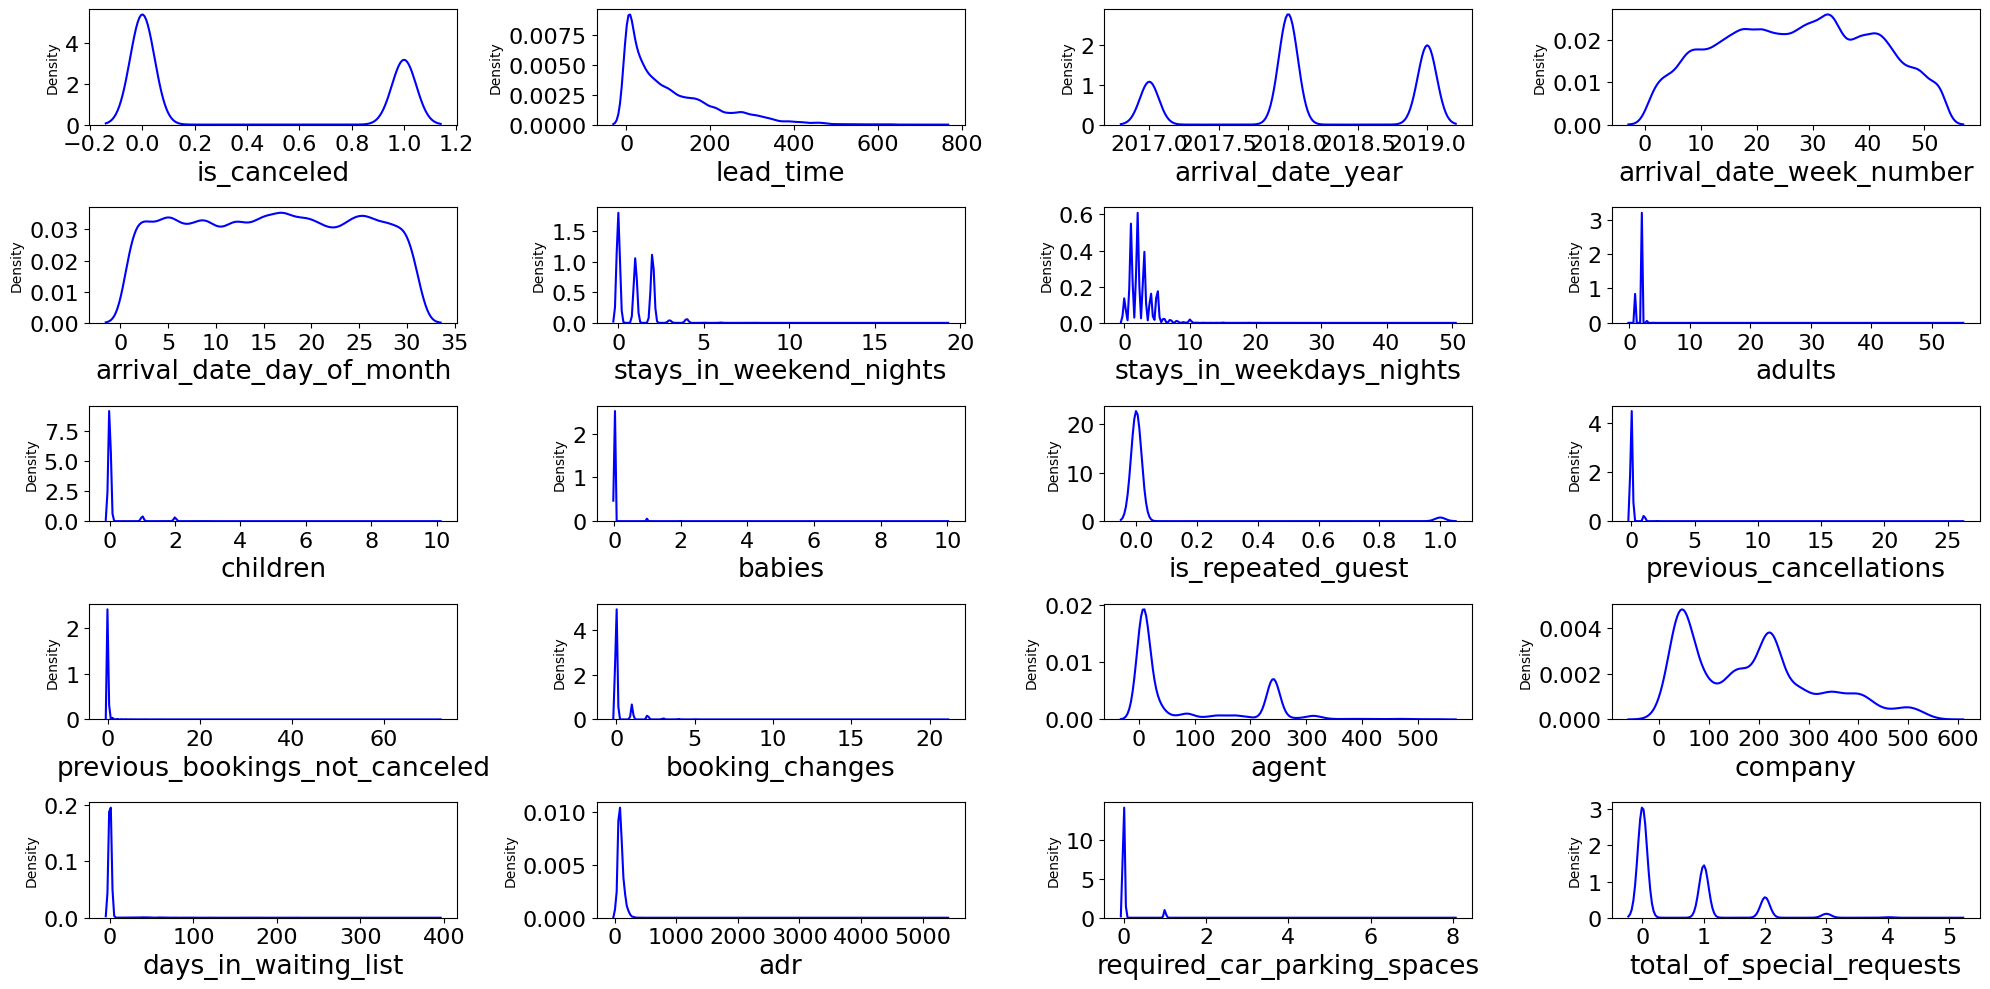

In [ ]:
#Plot Numerical
plt.figure(figsize=(20,10))
z=numeric_cols
for i in range (0, len(z)):
    plt.subplot(5,4,i+1)
    sns.kdeplot(x=df[z[i]], color='blue')
    plt.xlabel(z[i],size=19)
    plt.xticks(size=16)
    plt.yticks(size=16)
    plt.tight_layout()

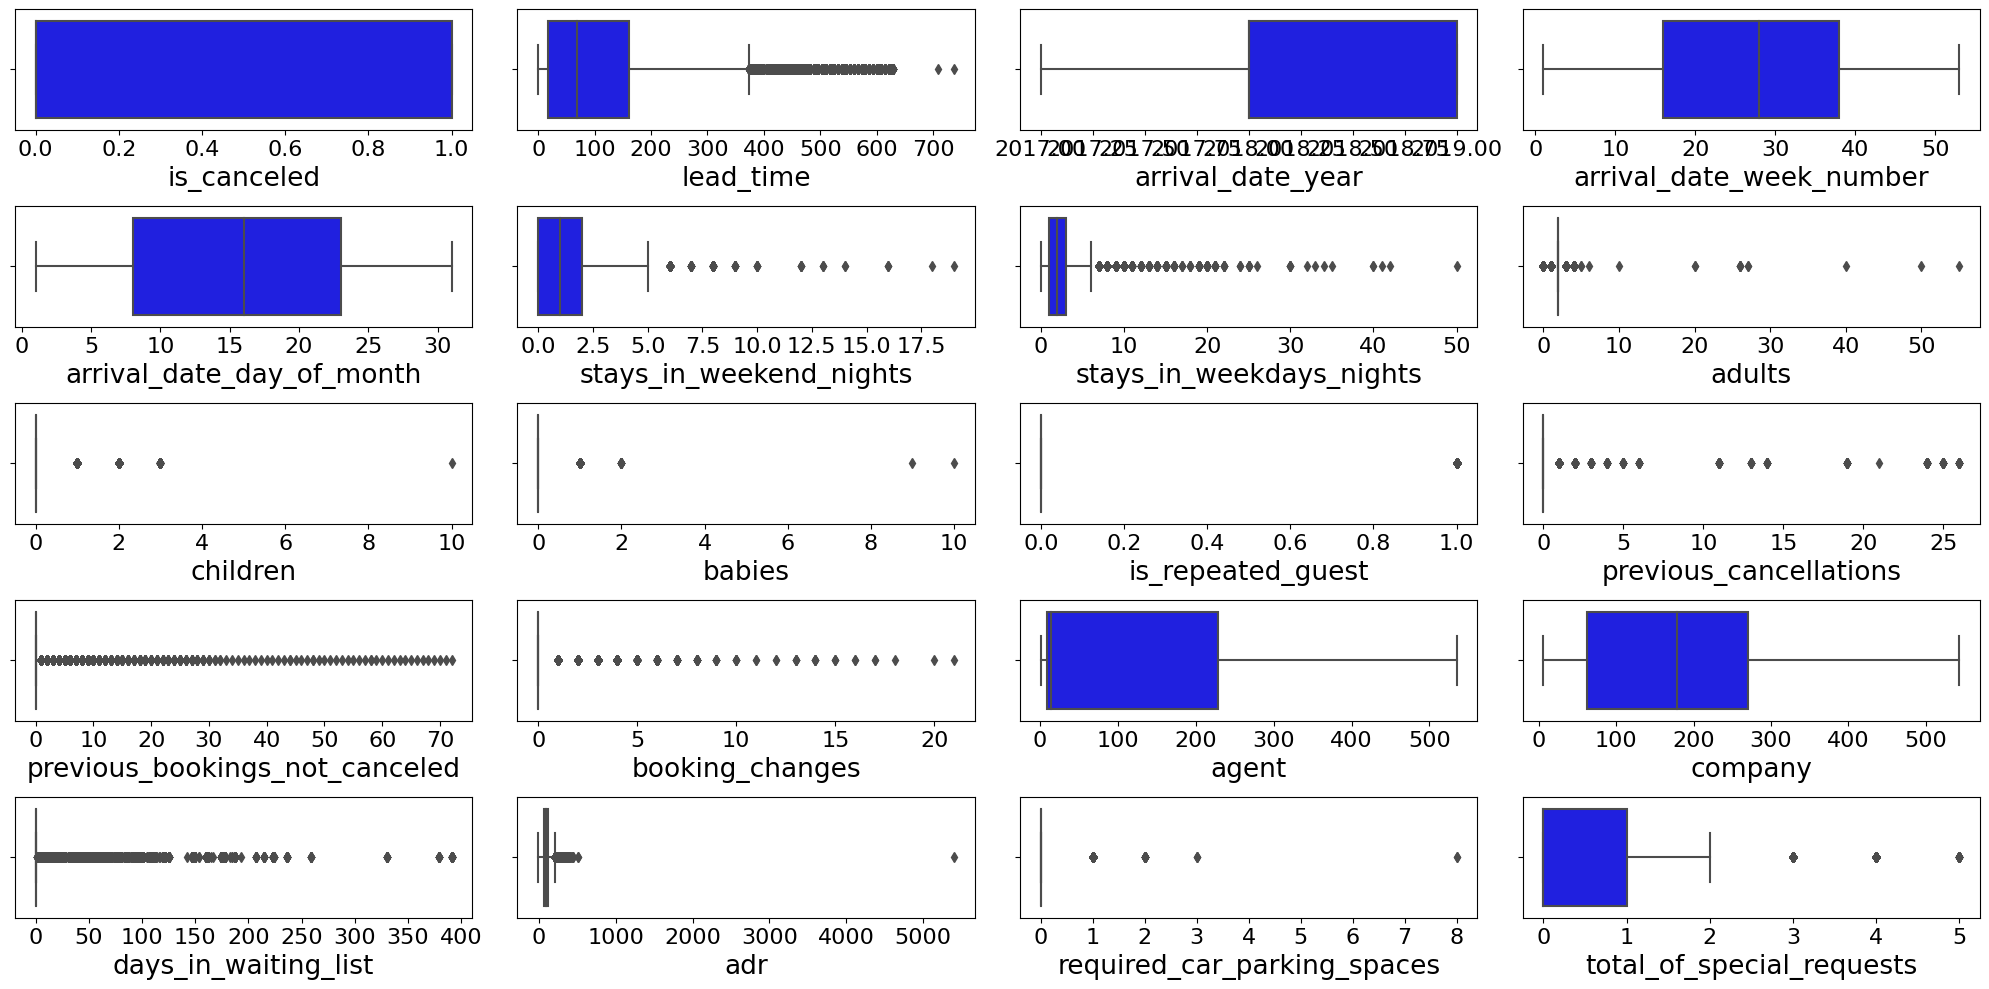

In [ ]:
#Plot Numerical
plt.figure(figsize=(20,10))
z=numeric_cols
for i in range (0, len(z)):
    plt.subplot(5,4,i+1)
    sns.boxplot(x=df[z[i]], color='blue')
    plt.xlabel(z[i],size=19)
    plt.xticks(size=16)
    plt.yticks(size=16)
    plt.tight_layout()

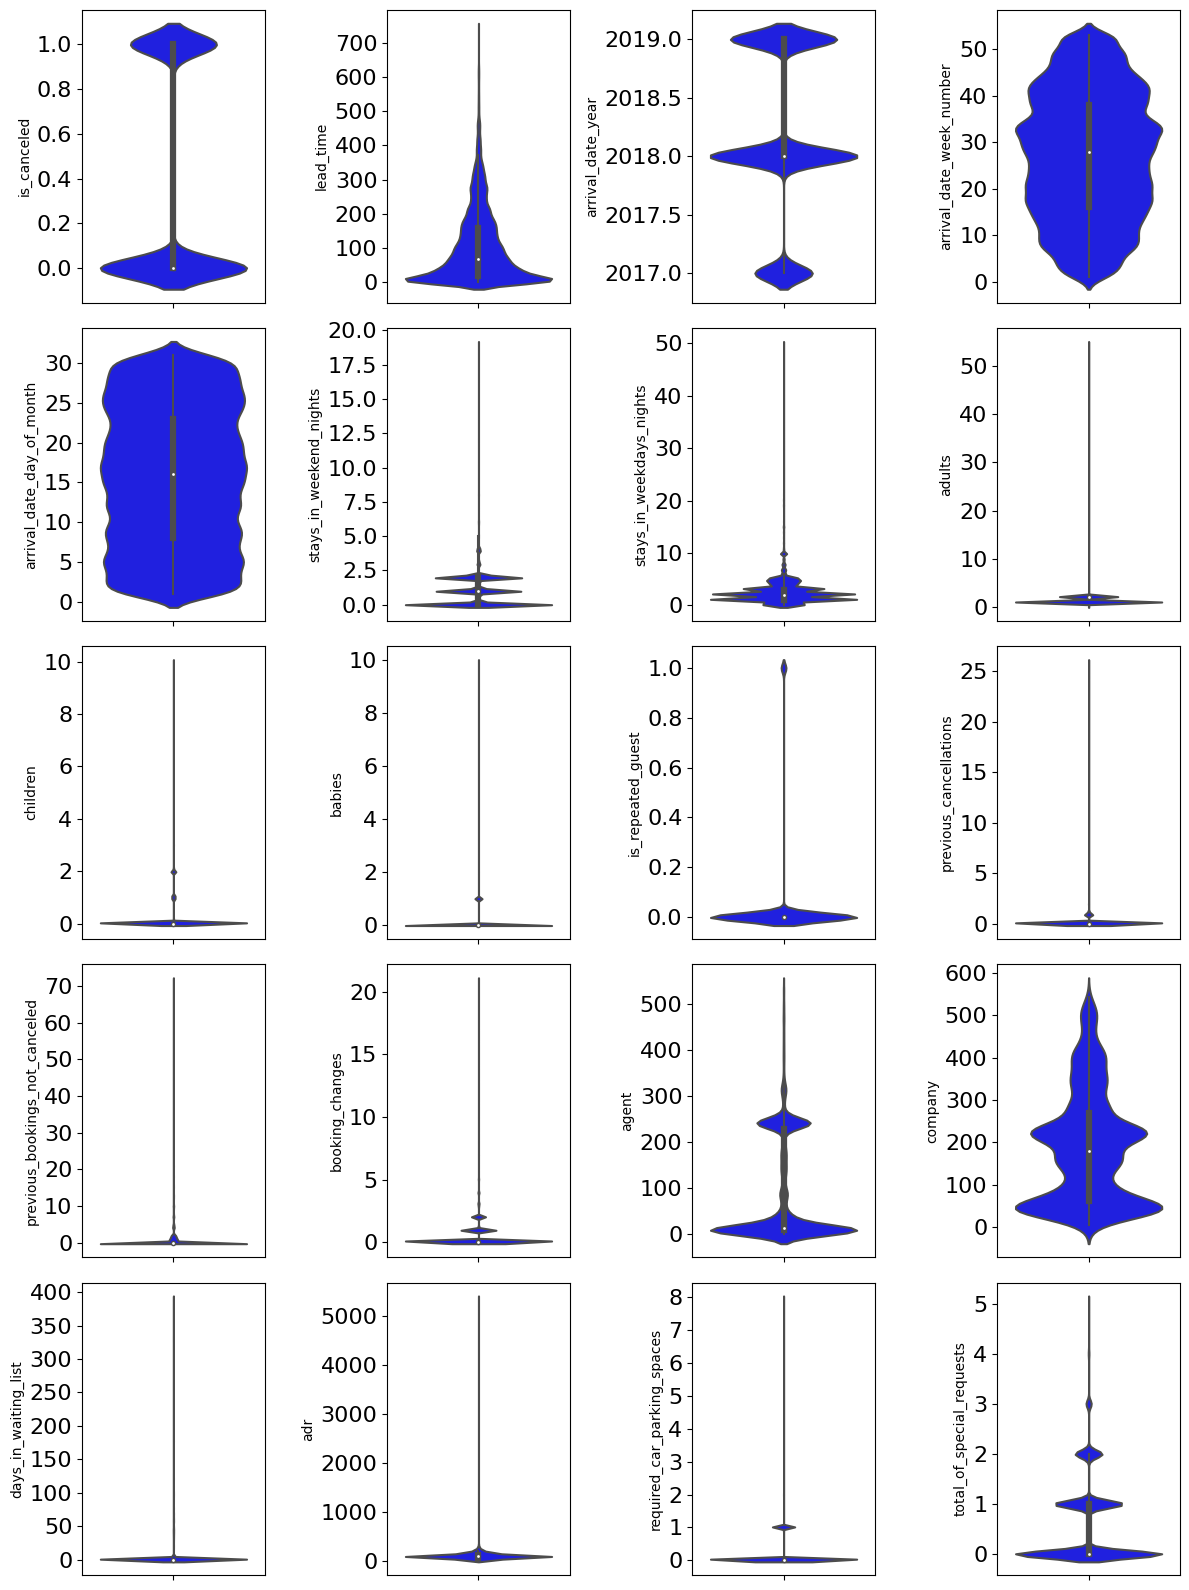

In [ ]:
#Plot Numerical
plt.figure(figsize=(12,16))
z=numeric_cols
for i in range (0, len(z)):
    plt.subplot(5,4,i+1)
    sns.violinplot(y=df[z[i]], color='blue')
    plt.xticks(size=16)
    plt.yticks(size=16)
    plt.tight_layout()

In [ ]:
# Deskripsi statistik kolom type categorical

df[object_cols].describe()

,hotel,arrival_date_month,meal,city,market_segment,distribution_channel,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,3,4,3
top,City Hotel,October,Breakfast,Kota Denpasar,Online TA,TA/TO,No Deposit,Personal,Check-Out
freq,79330,13877,92310,48590,56477,97870,104641,89613,75166


In [ ]:
# Kolom categorical
f = object_cols
f = object_cols.append(pd.Index(['is_canceled', 'arrival_date_year']))
f

Index(['hotel', 'arrival_date_month', 'meal', 'city', 'market_segment',
       'distribution_channel', 'deposit_type', 'customer_type',
       'reservation_status', 'is_canceled', 'arrival_date_year'],
      dtype='object')

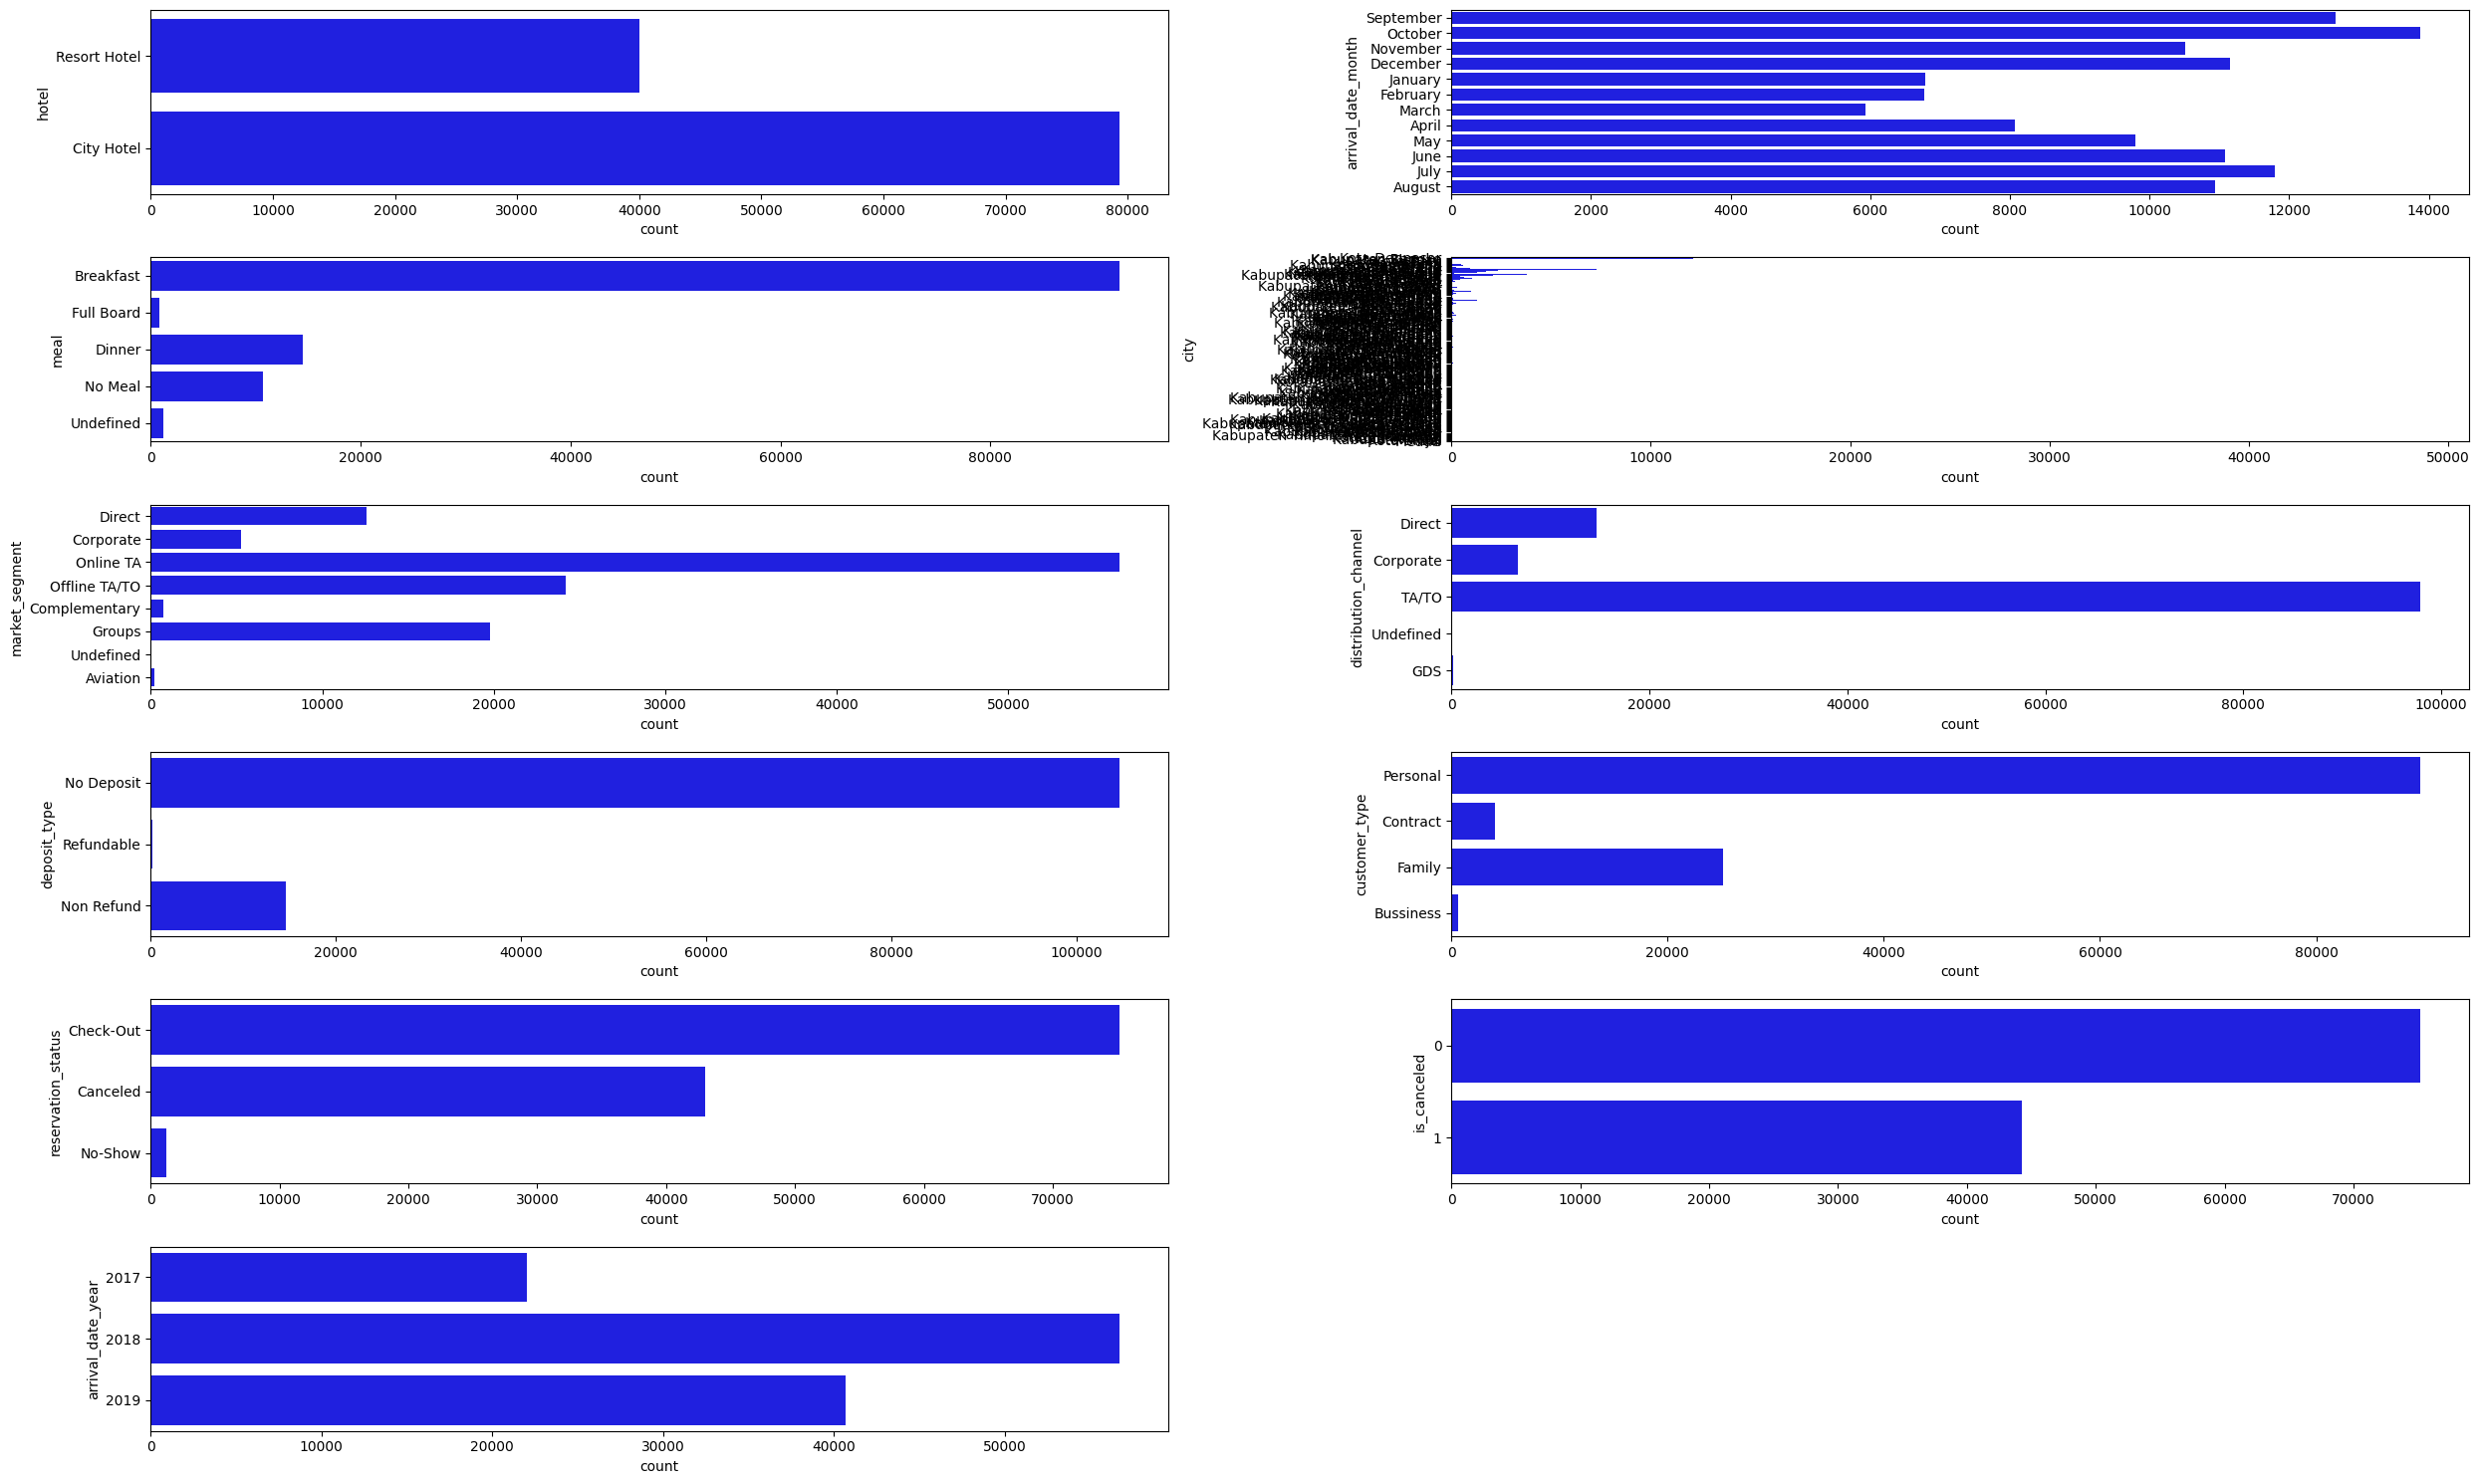

In [ ]:
plt.figure(figsize=(25,15))
for i in range(0, len(f)):
    plt.subplot(6,2,i+1)
    sns.countplot(y=df[f[i]], color='blue')
    plt.tight_layout()

In [ ]:
f = object_cols.append(pd.Index(['is_canceled', 'arrival_date_year']))
f

Index(['hotel', 'arrival_date_month', 'meal', 'city', 'market_segment',
       'distribution_channel', 'deposit_type', 'customer_type',
       'reservation_status', 'is_canceled', 'arrival_date_year'],
      dtype='object')

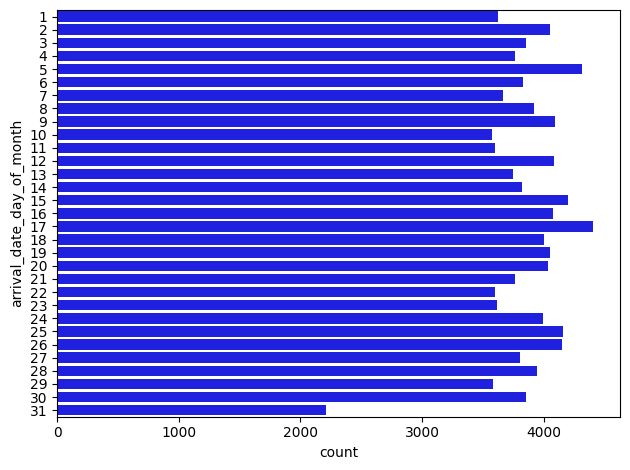

In [ ]:
|    sns.countplot(y=df['arrival_date_day_of_month'], color='blue')
    plt.tight_layout()

##Multivariate Analisys

<Axes: >

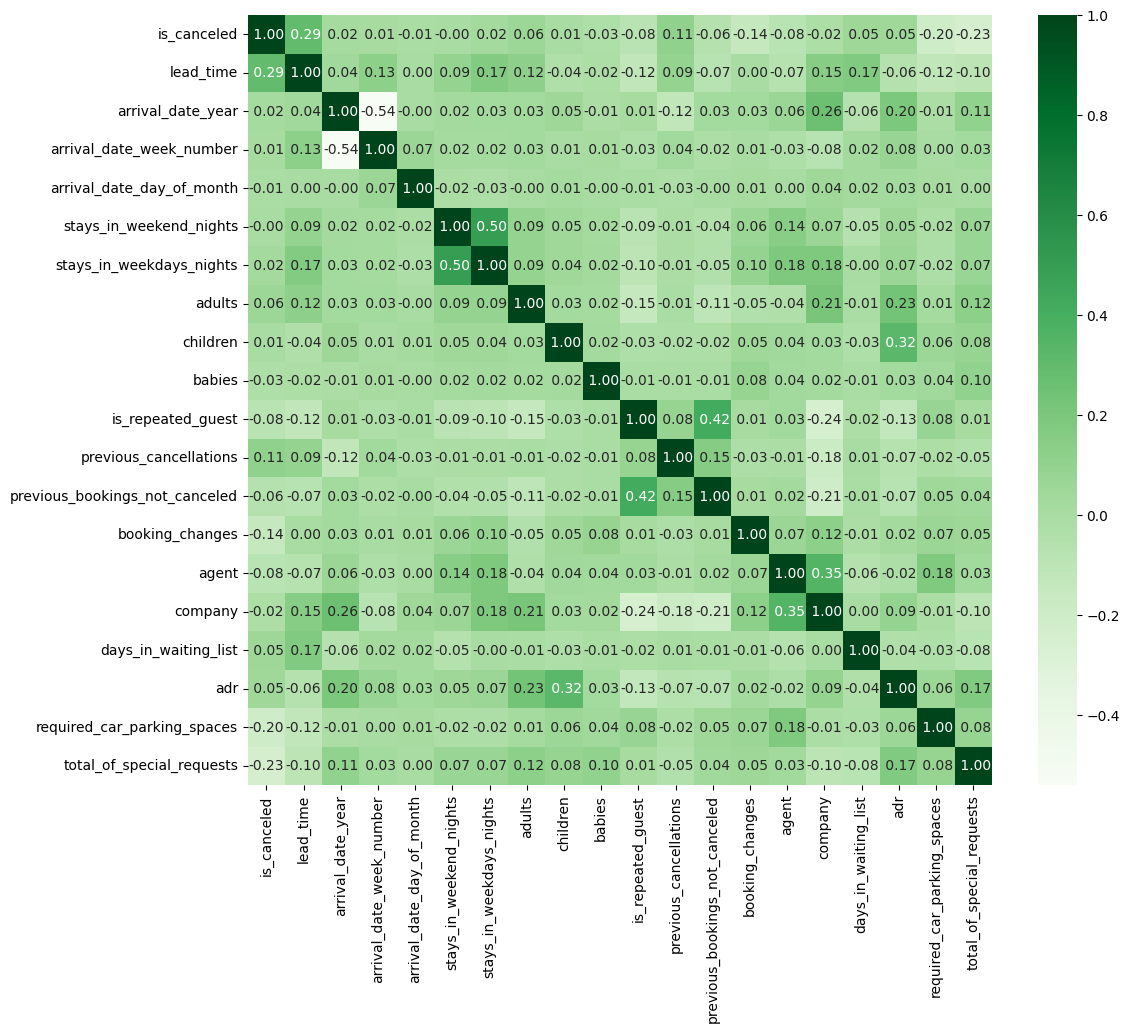

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df[numeric_cols].corr(), cmap="Greens", annot=True, fmt=' .2f')

# Preprocessing

##1.Megelompokkan jenis data

In [51]:
# Memisahkan kolom berdasarkan tipe data
object_cols = df.select_dtypes(include=['object']).columns
numeric_cols = df.select_dtypes(include=['int', 'float']).columns

print('Kolom tipe objek:\n', list(object_cols),'\n')
#print('Kolom tipe tanggal:\n', list(date),'\n')
print('Kolom tipe numerik:\n', list(numeric_cols))

Kolom tipe objek:
 ['hotel', 'arrival_date_month', 'meal', 'city', 'market_segment', 'distribution_channel', 'deposit_type', 'customer_type', 'reservation_status'] 

Kolom tipe numerik:
 ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_weekdays_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


In [52]:
# Define the columns yang drop
columns_to_drop = [ 'is_canceled']

# Mengurangi salah satu nama kolom dari numeric_cols
numeric_cols = numeric_cols.drop(columns_to_drop)

# Menambahkan salah satu nama kolom ke object_cols
object_cols = object_cols.append(pd.Index(['is_canceled']))


In [53]:

# Mengelompokan kolom per type

numerical = numeric_cols
categorical = object_cols


print('Kolom tipe objek:\n', list(categorical),'\n')
print('Kolom tipe numerik:\n', list(numerical))

Kolom tipe objek:
 ['hotel', 'arrival_date_month', 'meal', 'city', 'market_segment', 'distribution_channel', 'deposit_type', 'customer_type', 'reservation_status', 'is_canceled'] 

Kolom tipe numerik:
 ['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_weekdays_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


## 2.Missing Value

### Missing Values Existence

In [54]:
kolom_null = df.columns[df.isnull().any()]

# Tampilkan hasil
if len(kolom_null) > 0:
    print('Kolom-kolom yang memiliki nilai null:', list(kolom_null))
else:
    print('Tidak terdapat nilai null pada dataset')

Kolom-kolom yang memiliki nilai null: ['children', 'city', 'agent', 'company']


In [55]:
#Jumlah data null
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

###Penanganan Missing Value

In [56]:
#Cek Statistik Kolom dengan nilai Null
df[kolom_null].describe()

,children,agent,company
count,119386.000000,103050.000000,6797.000000
mean,0.103890,86.693382,189.266735
std,0.398561,110.774548,131.655015
min,0.000000,1.000000,6.000000
25%,0.000000,9.000000,62.000000
50%,0.000000,14.000000,179.000000
75%,0.000000,229.000000,270.000000
max,10.000000,535.000000,543.000000


In [57]:
df['city'].describe()

count            118902
unique              177
top       Kota Denpasar
freq              48590
Name: city, dtype: object

#### Imputasi

In [58]:
#Imputasi nilai mean pada fitur dengan tipe data numerical yang memiliki missing values
#Imputasi missing value type numerical dengan mean
num_miss = ['children','agent', 'company']
for i in num_miss:
  mean_fitur = df[i].mean()
  df[i] = df[i].fillna(mean_fitur)


In [59]:
#Imputasi nilai modus pada fitur dengan tipe data categorical yang memiliki missing values
cat_miss = ['city']
for i in cat_miss:
  df[i] = df[i].fillna('unknown')

In [60]:
#Cek Hasil Imputasi
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

##3.Duplicate

In [61]:
duplikat = df.duplicated()

# Hitung jumlah duplikat
jumlah_duplikat = duplikat.sum()

# Tampilkan hasil
if jumlah_duplikat > 0:
    print('Terdapat {} baris duplikat pada dataset'.format(jumlah_duplikat))
else:
    print('Tidak terdapat duplikat pada dataset')

Terdapat 33261 baris duplikat pada dataset


Dikarenakan pada data tersebut tidak memiliki kode booking yang bisa digunakan sebagai identitas pemesanan untuk memastikan apakah pemesanan tersebut benar-benar duplikat atau memang kebetulan memang miliki value yang sama untuk setiap barisnya sehingga tidak dilakukan pengahpusan untuk baris dengan nilai yang memiliki duplikat

## 4.Drop Fitur

Fitur **adult,children, dan babies** di bisa drop karena datanya tidak relevan, ada baris yang tidak memiliki value pada ketiga fitur tersebut, ada juga baris yang tidak memiliki value pada fitur adults, sedangkan tamu pada hotel tidak memperbolehkan anak kecil atau bayi menginap sendiri tanpa ada orang dewasa yang menemani, dan juga diperlukan tanda pengenal yang hanya dimiliiki orang dewasa untuk menginap di hotel.

In [62]:
# Menampilkan baris dengan adult = 0
filtered_df = df[df['adults'] == 0]
filtered_df[['adults','children','babies','customer_type']]

,adults,children,babies,customer_type
2224,0,0.0,0,Family
2409,0,0.0,0,Personal
3181,0,0.0,0,Family
3684,0,0.0,0,Family
3708,0,0.0,0,Family
...,...,...,...,...
117204,0,2.0,0,Personal
117274,0,2.0,0,Personal
117303,0,2.0,0,Personal
117453,0,2.0,0,Personal


In [63]:
df = df.drop(['adults','children','babies'], axis=1)

##5. Mengganti Value Tidak Sesuai

In [64]:
# Cek nilai pada fitur meal
df['meal'].unique()

array(['Breakfast', 'Full Board', 'Dinner', 'No Meal', 'Undefined'],
      dtype=object)

In [65]:
# Mengganti nilai "Undefined" menjadi "No Meal" pada kolom "meal"
df['meal'] = df['meal'].replace('Undefined', 'No Meal')

#Monthly Hotel Booking Analysis Based on Hotel Type

## Data Preparation

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   meal                            119390 non-null  object 
 10  city                            119390 non-null  object 
 11  market_segment                  119390 non-null  object 
 12  distribution_cha

In [67]:
# Mengurutkan nama bulan berdasarkan urutan kalender
month_order = list(calendar.month_name)[1:]
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=month_order, ordered=True)

# Mengurutkan DataFrame berdasarkan hotel dan bulan
sorted_table = df.sort_values(by=['hotel', 'arrival_date_month'])

In [68]:
# Membuat tabel agregat menggunakan groupby dan size()
aggregated_table = df.groupby(['hotel', 'arrival_date_month']).size().reset_index(name='number_of_booking')
aggregated_table


,hotel,arrival_date_month,number_of_booking
0,City Hotel,January,4357
1,City Hotel,February,4132
2,City Hotel,March,3736
3,City Hotel,April,4965
4,City Hotel,May,6458
5,City Hotel,June,7480
6,City Hotel,July,8232
7,City Hotel,August,7894
8,City Hotel,September,8088
9,City Hotel,October,8983


##Normalisasi data

In [69]:
# Melakukan normalisasi min-max pada kolom 'number_of_booking'
scaler = MinMaxScaler()
aggregated_table['normalized_booking'] = scaler.fit_transform(aggregated_table[['number_of_booking']])
aggregated_table

,hotel,arrival_date_month,number_of_booking,normalized_booking
0,City Hotel,January,4357,0.318704
1,City Hotel,February,4132,0.285567
2,City Hotel,March,3736,0.227246
3,City Hotel,April,4965,0.408247
4,City Hotel,May,6458,0.628130
5,City Hotel,June,7480,0.778645
6,City Hotel,July,8232,0.889396
7,City Hotel,August,7894,0.839617
8,City Hotel,September,8088,0.868189
9,City Hotel,October,8983,1.000000


## Plot Perubahan Jumlah Pemesanan Hotel

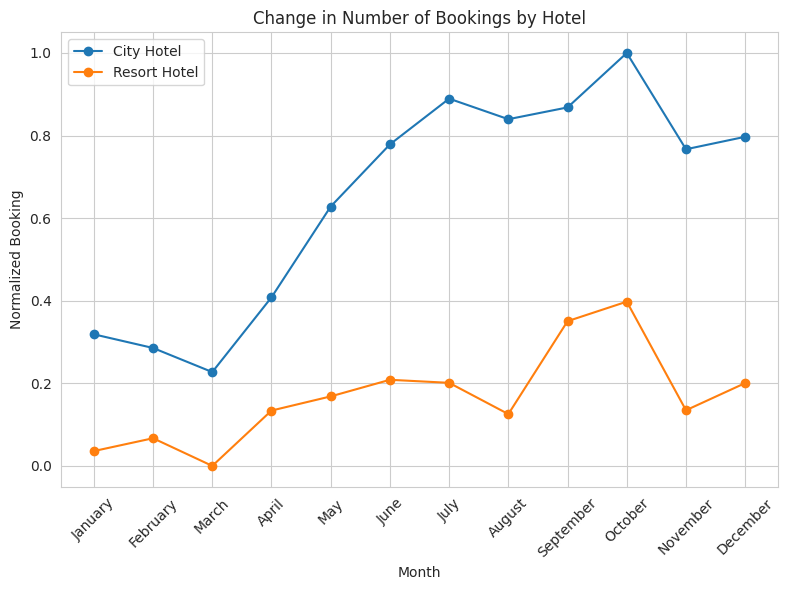

In [70]:
# Membuat plot perubahan jumlah pemesanan berdasarkan jenis hotel
fig, ax = plt.subplots(figsize=(8, 6))

# Memisahkan data berdasarkan jenis hotel
hotel_A_data = aggregated_table[aggregated_table['hotel'] == 'City Hotel']
hotel_B_data = aggregated_table[aggregated_table['hotel'] == 'Resort Hotel']

# Plot perubahan jumlah pemesanan untuk Hotel A
ax.plot(hotel_A_data['arrival_date_month'], hotel_A_data['normalized_booking'], marker='o', label='City Hotel')
# Plot perubahan jumlah pemesanan untuk Hotel B
ax.plot(hotel_B_data['arrival_date_month'], hotel_B_data['normalized_booking'], marker='o', label='Resort Hotel')

# Konfigurasi plot
ax.set_xlabel('Month')
ax.set_ylabel('Normalized Booking')
ax.set_title('Change in Number of Bookings by Hotel')
ax.legend()

# Menampilkan plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [71]:
from datetime import datetime

# Daftar tanggal merah
tanggal_merah = [
    datetime(2017, 1, 1),  # Tahun Baru Masehi
    datetime(2017, 2, 11),  # Tahun Baru Imlek
    datetime(2017, 3, 28),  # Hari Raya Nyepi
    datetime(2017, 4, 14),  # Wafat Isa Almasih
    datetime(2017, 4, 14),  # Hari Kebangkitan Nasional
    datetime(2017, 5, 1),  # Hari Buruh
    datetime(2017, 5, 11),  # Kenaikan Yesus Kristus
    datetime(2017, 6, 25),  # Idul Fitri
    datetime(2017, 6, 26),  # Idul Fitri
    datetime(2017, 8, 17),  # Hari Kemerdekaan
    datetime(2017, 9, 1),  # Idul Adha
    datetime(2017, 9, 21),  # Tahun Baru Hijriyah
    datetime(2017, 12, 25),  # Natal

    datetime(2018, 1, 1),  # Tahun Baru Masehi
    datetime(2018, 2, 16),  # Tahun Baru Imlek
    datetime(2018, 3, 17),  # Hari Raya Nyepi
    datetime(2018, 3, 30),  # Wafat Isa Almasih
    datetime(2018, 4, 14),  # Hari Kebangkitan Nasional
    datetime(2018, 5, 1),  # Hari Buruh
    datetime(2018, 5, 10),  # Kenaikan Yesus Kristus
    datetime(2018, 6, 15),  # Idul Fitri
    datetime(2018, 6, 16),  # Idul Fitri
    datetime(2018, 8, 17),  # Hari Kemerdekaan
    datetime(2018, 8, 22),  # Idul Adha
    datetime(2018, 9, 11),  # Tahun Baru Hijriyah
    datetime(2018, 12, 25),  # Natal

    datetime(2019, 1, 1),  # Tahun Baru Masehi
    datetime(2019, 2, 5),  # Tahun Baru Imlek
    datetime(2019, 3, 7),  # Hari Raya Nyepi
    datetime(2019, 4, 19),  # Wafat Isa Almasih
    datetime(2019, 5, 1),  # Hari Buruh
    datetime(2019, 5, 30),  # Kenaikan Yesus Kristus
    datetime(2019, 6, 5),  # Idul Fitri
    datetime(2019, 6, 6),  # Idul Fitri
    datetime(2019, 8, 17),  # Hari Kemerdekaan
    datetime(2019, 8, 11),  # Tahun Baru Hijriyah
    datetime(2019, 12, 25),  # Natal
]

# Membuat DataFrame dengan bulan sebagai indeks dan tahun sebagai kolom
hdf = pd.DataFrame(index=pd.date_range(start='2017-01-01', end='2019-12-31', freq='D'), columns=[str(year) for year in range(2017, 2020)])

# Mengisi DataFrame dengan jumlah tanggal merah
for tanggal in hdf.index:
    if tanggal in tanggal_merah:
        hdf.loc[tanggal, str(tanggal.year)] = 1
    else:
        hdf.loc[tanggal, str(tanggal.year)] = 0

# Mengurutkan bulan secara kronologis
hdf = hdf.groupby(hdf.index.strftime('%B')).sum()

# Mengubah tipe data kolom menjadi integer
hdf = hdf.astype(int)

# Mengatur ulang indeks menjadi nama bulan
hdf = hdf.reindex(["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])

# Menghitung rata-rata tanggal merah tiap bulan
hdf['Mean'] = df.mean(axis=1)

# Menampilkan DataFrame
print(hdf)


           2017  2018  2019  Mean
January       1     1     1   NaN
February      1     1     1   NaN
March         1     2     1   NaN
April         1     1     1   NaN
May           2     2     2   NaN
June          2     2     2   NaN
July          0     0     0   NaN
August        1     2     2   NaN
September     2     1     0   NaN
October       0     0     0   NaN
November      0     0     0   NaN
December      1     1     1   NaN


<ipython-input-71-231654acba2d>:66: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  hdf['Mean'] = df.mean(axis=1)


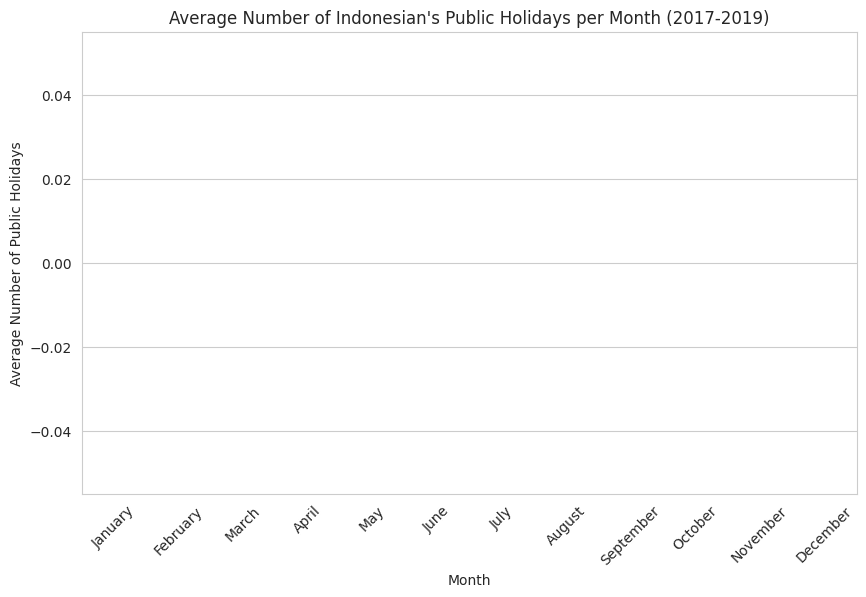

In [72]:
# Membuat plot menggunakan seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=hdf.index, y='Mean', data=hdf, palette="bright")
plt.xlabel('Month')
plt.ylabel('Average Number of Public Holidays')
plt.title("Average Number of Indonesian's Public Holidays per Month (2017-2019)")
plt.xticks(rotation=45)
plt.show()

#Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates

## Data Preparation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   hotel                           119390 non-null  object  
 1   is_canceled                     119390 non-null  int64   
 2   lead_time                       119390 non-null  int64   
 3   arrival_date_year               119390 non-null  int64   
 4   arrival_date_month              119390 non-null  category
 5   arrival_date_week_number        119390 non-null  int64   
 6   arrival_date_day_of_month       119390 non-null  int64   
 7   stays_in_weekend_nights         119390 non-null  int64   
 8   stays_in_weekdays_nights        119390 non-null  int64   
 9   adults                          119390 non-null  int64   
 10  children                        119390 non-null  float64 
 11  babies                          119390 non-null  int64   
 12  me

## Membuat Kolom Baru Berisi Total Durasi Menginap

In [ ]:
df_stay = df[['hotel','stays_in_weekend_nights','stays_in_weekdays_nights','is_canceled']]
df_stay = df_stay.assign(total_stays=df_stay['stays_in_weekend_nights'] + df_stay['stays_in_weekdays_nights'])
df_stay

,hotel,stays_in_weekend_nights,stays_in_weekdays_nights,is_canceled,total_stays
0,Resort Hotel,0,0,0,0
1,Resort Hotel,0,0,0,0
2,Resort Hotel,0,1,0,1
3,Resort Hotel,0,1,0,1
4,Resort Hotel,0,2,0,2
...,...,...,...,...,...
119385,City Hotel,2,5,0,7
119386,City Hotel,2,5,0,7
119387,City Hotel,2,5,0,7
119388,City Hotel,2,5,0,7


##Menghitung jumlah total_stays berdasarkan hotel dan is_canceled

In [ ]:
hotel_stats = df_stay.groupby('hotel')[['total_stays']].describe()
hotel_stats

total_stays                                              
                   count      mean       std  min  25%  50%  75%   max
hotel                                                                 
City Hotel       79330.0  2.978142  1.862937  0.0  2.0  3.0  4.0  57.0
Resort Hotel     40060.0  4.318547  3.380273  0.0  2.0  3.0  7.0  69.0

In [ ]:
hotel_mode = df_stay.groupby('hotel')['total_stays'].agg(lambda x: x.mode().iloc[0]).reset_index()

# Menampilkan nilai modus tiap hotel
hotel_mode

,hotel,total_stays
0,City Hotel,2
1,Resort Hotel,1


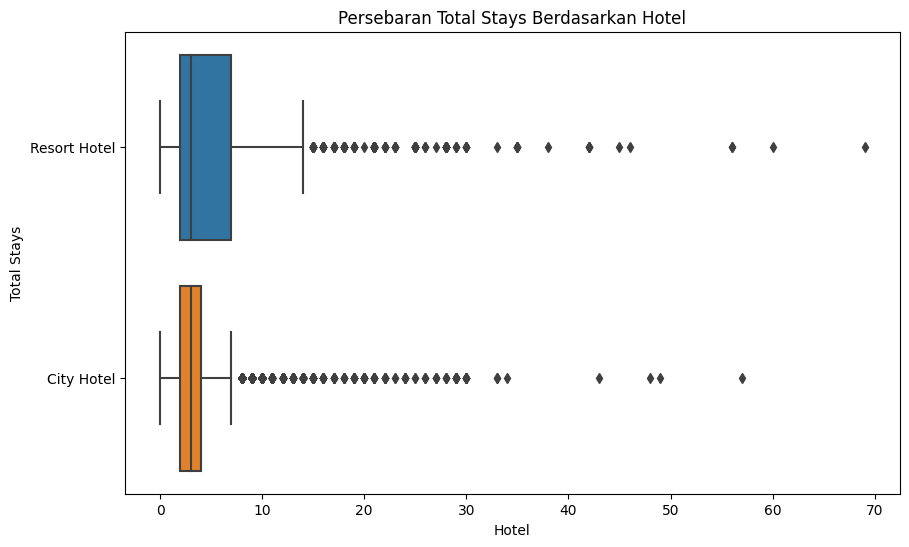

In [ ]:
# Membuat box plot
plt.figure(figsize=(10, 6))  # Ukuran gambar
sns.boxplot(y='hotel', x='total_stays', data=df_stay)
plt.xlabel('Hotel')  # Label sumbu x
plt.ylabel('Total Stays')  # Label sumbu y
plt.title('Persebaran Total Stays Berdasarkan Hotel')  # Judul plot
plt.show()


In [ ]:
cancelled_stats = df_stay.groupby(['hotel', 'is_canceled', 'total_stays']).agg({'stays_in_weekdays_nights': 'count'})
cancelled_stats = cancelled_stats.rename(columns={'stays_in_weekdays_nights': 'count'})

# Menampilkan tabel agregat dengan nama kolom yang diubah
cancelled_stats = cancelled_stats.reset_index()
cancelled_stats

,hotel,is_canceled,total_stays,count
0,City Hotel,0,0,308
1,City Hotel,0,1,9169
2,City Hotel,0,2,10992
3,City Hotel,0,3,11895
4,City Hotel,0,4,7704
...,...,...,...,...
127,Resort Hotel,1,29,1
128,Resort Hotel,1,30,3
129,Resort Hotel,1,33,1
130,Resort Hotel,1,42,1


## Tabel Agregat Untuk Menghitung Proporsi Cancel Berdasarkan hotel,total_stays

In [ ]:
# Mengubah nilai 'is_canceled' menjadi kolom
cancelled_stats = cancelled_stats.pivot_table(index=['hotel', 'total_stays'], columns='is_canceled', values='count').reset_index()


In [ ]:
# Menampilkan tabel agregat
cancelled_stats

is_canceled,hotel,total_stays,0,1
0,City Hotel,0,308.0,23.0
1,City Hotel,1,9169.0,4103.0
2,City Hotel,2,10992.0,10434.0
3,City Hotel,3,11895.0,9486.0
4,City Hotel,4,7704.0,4853.0
...,...,...,...,...
71,Resort Hotel,45,1.0,NaN
72,Resort Hotel,46,1.0,NaN
73,Resort Hotel,56,1.0,1.0
74,Resort Hotel,60,1.0,NaN


In [ ]:
# Mengisi nilai NaN pada kolom 'is_canceled' dengan 1 menjadi 0
cancelled_stats[1] = cancelled_stats[1].fillna(0)

# Menghitung proporsi is_canceled=0
cancelled_stats['Proporsi Cancel'] = cancelled_stats[1] / (cancelled_stats[0] + cancelled_stats[1])

# Menampilkan tabel agregat dengan proporsi
cancelled_stats

is_canceled,hotel,total_stays,0,1,Proporsi Cancel
0,City Hotel,0,308.0,23.0,0.069486
1,City Hotel,1,9169.0,4103.0,0.309147
2,City Hotel,2,10992.0,10434.0,0.486978
3,City Hotel,3,11895.0,9486.0,0.443665
4,City Hotel,4,7704.0,4853.0,0.386478
...,...,...,...,...,...
71,Resort Hotel,45,1.0,0.0,0.000000
72,Resort Hotel,46,1.0,0.0,0.000000
73,Resort Hotel,56,1.0,1.0,0.500000
74,Resort Hotel,60,1.0,0.0,0.000000


## Plot Persebaran Proporsi Cancel

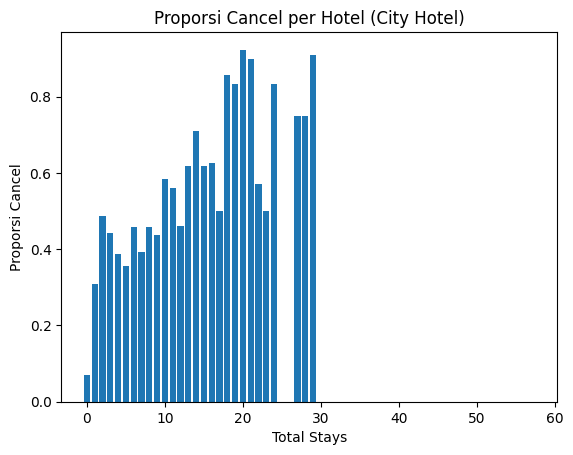

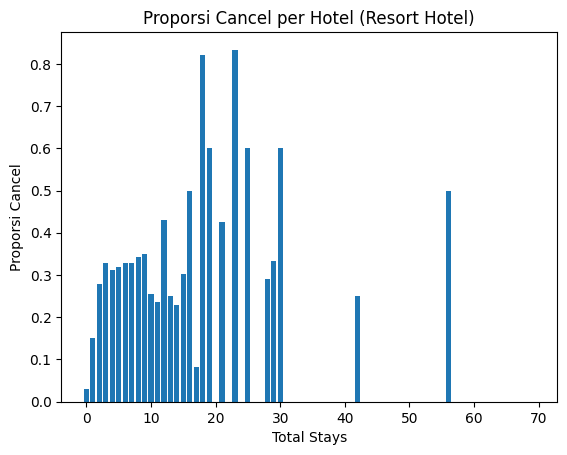

In [ ]:
# Membuat plot untuk masing-masing hotel
for hotel_type in cancelled_stats['hotel'].unique():
    data = cancelled_stats[cancelled_stats['hotel'] == hotel_type]
    x = data['total_stays']
    y = data['Proporsi Cancel']
    
    # Membuat bar plot
    plt.figure()
    plt.bar(x, y)
    plt.xlabel('Total Stays')
    plt.ylabel('Proporsi Cancel')
    plt.title(f'Proporsi Cancel per Hotel ({hotel_type})')
    plt.show()

#Impact Analysis of Lead Time on Hotel Bookings Cancellation Rat

## Data Preparation

In [ ]:
df['lead_time'].describe()

count    119390.000000
mean        104.011416
std         106.863097
min           0.000000
25%          18.000000
50%          69.000000
75%         160.000000
max         737.000000
Name: lead_time, dtype: float64

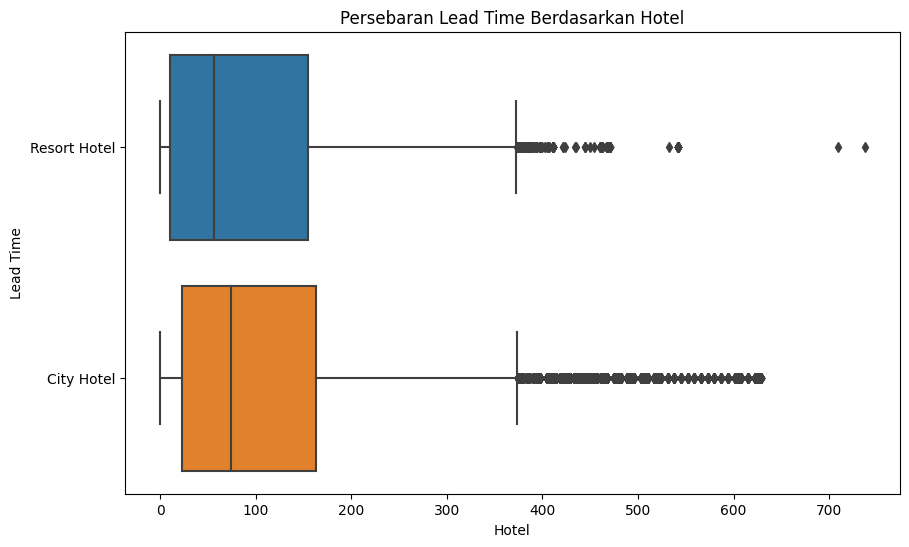

In [ ]:
# Membuat box plot
plt.figure(figsize=(10, 6))  # Ukuran gambar
sns.boxplot(y='hotel', x='lead_time', data=df)
plt.xlabel('Hotel')  # Label sumbu x
plt.ylabel('Lead Time')  # Label sumbu y
plt.title('Persebaran Lead Time Berdasarkan Hotel')  # Judul plot
plt.show()

##Membuat kolom kategori lead_time berdasarkan Q1,Q2,Q3

In [ ]:
#Fungsi untuk kategorisasi lead_time
def categorize_lead_time(lead_time):
    if lead_time <= 18:
        return 'Very Short'
    elif lead_time <= 69:
        return 'Short'
    elif lead_time <= 160:
        return 'Medium'
    else:
        return 'Long'

# Membuat kolom baru 'lead_time_category'
df['lead_time_category'] = df['lead_time'].apply(categorize_lead_time)

# Menampilkan DataFrame
df_lt = df[['hotel', 'is_canceled', 'lead_time', 'lead_time_category']]
df_lt

,hotel,is_canceled,lead_time,lead_time_category
0,Resort Hotel,0,342,Long
1,Resort Hotel,0,737,Long
2,Resort Hotel,0,7,Very Short
3,Resort Hotel,0,13,Very Short
4,Resort Hotel,0,14,Very Short
...,...,...,...,...
119385,City Hotel,0,23,Short
119386,City Hotel,0,102,Medium
119387,City Hotel,0,34,Short
119388,City Hotel,0,109,Medium


In [ ]:
# Membuat tabel agregat menggunakan groupby dan size()
aggregated_table = df_lt.groupby(['hotel', 'lead_time_category', 'is_canceled']).size().reset_index(name='number_of_bookings')

# Menampilkan tabel agregat
aggregated_table


,hotel,lead_time_category,is_canceled,number_of_bookings
0,City Hotel,Long,0,7633
1,City Hotel,Long,1,12707
2,City Hotel,Medium,0,11403
3,City Hotel,Medium,1,9230
4,City Hotel,Short,0,12624
5,City Hotel,Short,1,7997
6,City Hotel,Very Short,0,14568
7,City Hotel,Very Short,1,3168
8,Resort Hotel,Long,0,5656
9,Resort Hotel,Long,1,3826


In [ ]:
# Pivot tabel agregat
cancelled_stats = aggregated_table.pivot_table(index=['hotel', 'lead_time_category'], columns='is_canceled', values='number_of_bookings').reset_index()
cancelled_stats

is_canceled,hotel,lead_time_category,0,1
0,City Hotel,Long,7633,12707
1,City Hotel,Medium,11403,9230
2,City Hotel,Short,12624,7997
3,City Hotel,Very Short,14568,3168
4,Resort Hotel,Long,5656,3826
5,Resort Hotel,Medium,5634,3402
6,Resort Hotel,Short,6385,2633
7,Resort Hotel,Very Short,11263,1261


In [ ]:
# Melakukan pivot tabel agregat
cancelled_stats = aggregated_table.pivot_table(index=['hotel', 'lead_time_category'], columns='is_canceled', values='number_of_bookings').reset_index()

# Menghitung total jumlah pemesanan untuk setiap kategori lead time
cancelled_stats['Total Pemesanan'] = cancelled_stats[0] + cancelled_stats[1]

# Menghitung tingkat pembatalan untuk setiap kategori lead time
cancelled_stats['Tingkat Pembatalan'] = cancelled_stats[1] / cancelled_stats['Total Pemesanan']

# Mengurutkan kategori pada sumbu x
cancelled_stats = cancelled_stats.sort_values(by='lead_time_category', ascending=False)

# Menampilkan tabel agregat
cancelled_stats

is_canceled,hotel,lead_time_category,0,1,Total Pemesanan,Tingkat Pembatalan
3,City Hotel,Very Short,14568,3168,17736,0.178620
7,Resort Hotel,Very Short,11263,1261,12524,0.100687
2,City Hotel,Short,12624,7997,20621,0.387809
6,Resort Hotel,Short,6385,2633,9018,0.291972
1,City Hotel,Medium,11403,9230,20633,0.447342
5,Resort Hotel,Medium,5634,3402,9036,0.376494
0,City Hotel,Long,7633,12707,20340,0.624730
4,Resort Hotel,Long,5656,3826,9482,0.403501


##Plot rasio pembatalan pesanan terhadap jarak waktu pemesanan untuk setiap tipe hotel


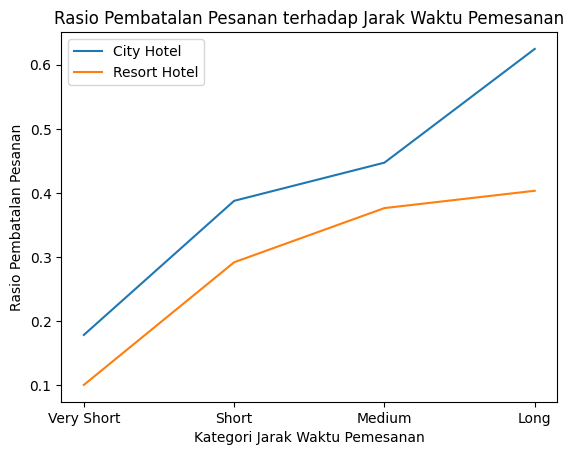

In [ ]:
# Filter data untuk setiap tipe hotel
hotel_A = cancelled_stats[cancelled_stats['hotel'] == 'City Hotel']
hotel_B = cancelled_stats[cancelled_stats['hotel'] == 'Resort Hotel']

# Membuat plot untuk hotel A
plt.plot(hotel_A['lead_time_category'], hotel_A['Tingkat Pembatalan'], label='City Hotel')

# Membuat plot untuk hotel B
plt.plot(hotel_B['lead_time_category'], hotel_B['Tingkat Pembatalan'], label='Resort Hotel')

# Menambahkan judul dan label sumbu pada plot
plt.title('Rasio Pembatalan Pesanan terhadap Jarak Waktu Pemesanan')
plt.xlabel('Kategori Jarak Waktu Pemesanan')
plt.ylabel('Rasio Pembatalan Pesanan')

# Menampilkan legenda
plt.legend()

# Menampilkan plot
plt.show()
